# INFO

This is my solution for the fourth homework problem.

# **SOLUTION**

# Description

I will use network with:
- input layer with **2 neurons** (two input variables)
- **one** hidden layer with **2 neurons** (I need to split the plane in a nonlinear way, creating a U-shaped plane containing the diagonal points)
- output layer with 1 neuron (result - active or inactive)

Also, as an activation function I will use a sigmoid function - simple, values between (0, 1) and with simple derivative

# CODE

In [57]:
import numpy as np

Let's define our sigmoid function and its derivative

In [58]:
def sigmoid(x, derivative=False):
  if derivative:
    return x * (1 - x)
  else:
    return 1 / (1 + np.exp(-x))

Now, number of neurons per layer

In [59]:
layers_sizes = np.array([2, 2, 1])

And layers initialization function

In [83]:
def init_layers(sizes):
  weights = [np.random.uniform(size=size) for size in zip(sizes[0:-1], sizes[1:])]
  biases = [np.random.uniform(size=(size, 1)) for size in sizes[1:]]

  return weights, biases

Function which execute network (forward propagation).

Takes input layer, following layers weights and biases and activation function. Returns layers outputs.

In [142]:
def execute(input, weights, biases, activation_f):
  result = [input]
  previous_layer = input

  for weight, bias in zip(weights, biases):
    executed_layer = execute_layer(previous_layer, weight, bias, activation_f)

    previous_layer = executed_layer
    result.append(executed_layer)

  return result

 
def execute_layer(input_layer, weight, bias, activation_f):
  layer_activation = np.dot(input_layer.T, weight).T + bias

  return activation_f(layer_activation)

And time for the backpropagation function.

Function takes layers outputs, weights, biases and activation function, expected output and learning rate.

In [143]:
def backpropagation(layers_outputs,
                    weights,
                    biases,
                    activation_f,
                    expected_output,
                    learning_rate):

  updated_weights = weights.copy()
  updated_biases = biases.copy()

  predicted_output = layers_outputs[-1]

  output_error = 2 * (expected_output - predicted_output)
  output_delta = output_error * activation_f(predicted_output, True)

  updated_weights[-1] += layers_outputs[-2].dot(output_delta.T) * learning_rate
  updated_biases[-1] += output_delta * learning_rate

  next_layer_delta = output_delta

  for layer_id in reversed(range(1, len(layers_outputs)-1)):
    weight_id = layer_id - 1

    error = np.dot(weights[weight_id+1], next_layer_delta)
    delta = error * activation_f(layers_outputs[layer_id], True)
    
    updated_weights[weight_id] += layers_outputs[layer_id-1].dot(delta.T) * learning_rate
    updated_biases[weight_id] += delta * learning_rate

    next_layer_delta = delta

  return updated_weights, updated_biases

---
Create test set:

In [144]:
test_set_X = [np.array([[0], [0]]), np.array([[1], [0]]), np.array([[0], [1]]), np.array([[1], [1]])]
test_set_Y = [np.array([[0]]), np.array([[1]]), np.array([[1]]), np.array([[0]])]

And training parameters:

In [145]:
learning_rate = 0.07
number_of_iterations = 30000

And train out model:

In [147]:
weights, biases = init_layers(layers_sizes)

errors = []

for iteration in range(number_of_iterations):
  error = 0
  for test_x, test_y in zip(test_set_X, test_set_Y):
    values = execute(test_x, weights, biases, sigmoid)
    predicted_y = values[-1]

    error += np.sum((predicted_y - test_y) ** 2) / len(test_y)

    new_weights, new_biases = backpropagation(values, weights, biases, sigmoid, test_y, learning_rate)
    weights = new_weights
    biases = new_biases

  print("iteration number {} done! Error: {}".format(iteration, error / len(test_set_X)))
  errors.append(error / len(test_set_X))

Streaming output truncated to the last 5000 lines.
iteration number 25000 done! Error: 0.00045371713494963964
iteration number 25001 done! Error: 0.00045369499548500995
iteration number 25002 done! Error: 0.0004536728581278429
iteration number 25003 done! Error: 0.00045365072287784287
iteration number 25004 done! Error: 0.00045362858973471134
iteration number 25005 done! Error: 0.0004536064586981529
iteration number 25006 done! Error: 0.0004535843297678677
iteration number 25007 done! Error: 0.00045356220294356253
iteration number 25008 done! Error: 0.00045354007822493683
iteration number 25009 done! Error: 0.0004535179556116912
iteration number 25010 done! Error: 0.00045349583510353704
iteration number 25011 done! Error: 0.00045347371670017195
iteration number 25012 done! Error: 0.0004534516004012991
iteration number 25013 done! Error: 0.00045342948620661966
iteration number 25014 done! Error: 0.00045340737411584303
iteration number 25015 done! Error: 0.0004533852641286642
iteration n

And plot the error over iterations

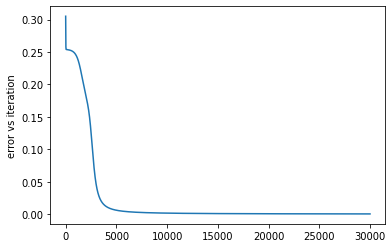

In [148]:
import matplotlib.pyplot as plt

plt.plot(errors)
plt.ylabel('error vs iteration')
plt.show()

And print results

In [149]:
print("iterations: {}, learning rate: {}".format(number_of_iterations, learning_rate))
for test_x, test_y in zip(test_set_X, test_set_Y):
  values = execute(test_x, weights, biases, sigmoid)
  predicted_y = values[-1]
  print("{} xor {} = {} ({} confidence)".format(test_x[0][0], test_x[1][0], round(predicted_y[0][0]), predicted_y))

iterations: 30000, learning rate: 0.07
0 xor 0 = 0 ([[0.02099635]] confidence)
1 xor 0 = 1 ([[0.98180765]] confidence)
0 xor 1 = 1 ([[0.98183589]] confidence)
1 xor 1 = 0 ([[0.01885256]] confidence)
